In [1]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = False
theme, cs = rp.mpl_setup(is_dark)

In [2]:
%cd ~/cdv/

/home/nmiklaucic/cdv


/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import json
with open('precomputed/mp2022/raw_metadata.json', 'r') as f:
    metadata = json.load(f)
    
df = pd.read_feather('precomputed/mp2022/energy_data.feather')
df

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,energy,total_energy
0,0.0,232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.304165,-1230.566253
1,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.064923,-65.038769
2,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.795275,-53.133846
3,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.920932,-47.051190
4,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.640220,-51.042420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,48.0,6.0,0.0,0.0,0.0,-7.077639,-566.211133
154714,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,-5.462179,-327.730751
154715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,-6.329547,-259.511434
154716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,-4.575419,-164.715067


In [8]:
from pathlib import Path
for group_i, num_batches in enumerate(metadata['batches_per_group']):
    for batch in sorted(Path(f'precomputed/mp2022/batches/group_{group_i:04}/').glob('*.mpk'))[num_batches:]:
        print(batch)

In [4]:
from pymatgen.core import Element

symbols = [Element.from_Z(z).symbol for z in metadata['atomic_numbers'][1:]]

df.columns = ['0', *symbols, 'energy', 'total_energy']
df

,0,Si,Ca,As,Sb,Cu,Se,Tm,Sn,Ac,...,W,Ne,C,O,V,He,Kr,Xe,energy,total_energy
0,0.0,232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.304165,-1230.566253
1,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.064923,-65.038769
2,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.795275,-53.133846
3,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.920932,-47.051190
4,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.640220,-51.042420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,48.0,6.0,0.0,0.0,0.0,-7.077639,-566.211133
154714,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,-5.462179,-327.730751
154715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,-6.329547,-259.511434
154716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,-4.575419,-164.715067


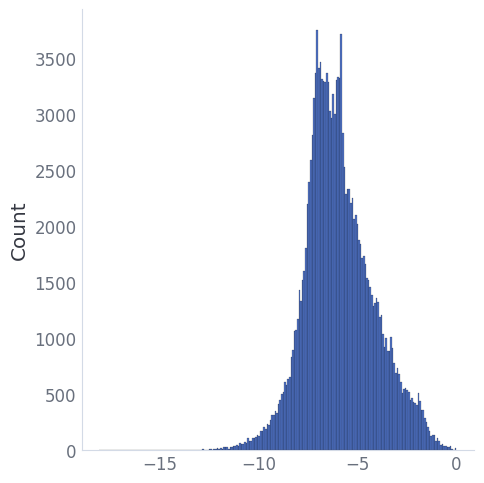

In [5]:
num_atoms = df.iloc[:, :-2].sum(axis=1)
y = df['energy'].values

X = df.iloc[:, :-2]

sns.displot(y)

In [42]:
import os
os.environ['KERAS_BACKEND'] = 'jax'

import keras
from keras import layers
from keras import ops

import tensorflow_probability.substrates.jax as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

global_shift = np.median(y)
global_scale = np.mean(np.abs(y - global_shift))
print(global_shift, global_scale)
print(tfd.Laplace(global_shift, global_scale).log_prob(y).mean())

# global_shift = 0
# global_scale = 1



class SpeciesEnergyModel(keras.Model):
    """Models mean and MAE of each element's energy."""
    def __init__(self):
        super().__init__()
        self.shift = layers.Dense(1, kernel_initializer='zeros', bias_initializer=lambda shape, dtype: global_shift * keras.initializers.Ones()(shape, dtype))
        self.scale = layers.Dense(1, kernel_initializer='zeros', bias_initializer=lambda shape, dtype: ops.log(global_scale) * keras.initializers.Ones()(shape, dtype))

        self.built = True

    def predict_dist(self, X):
        num_atoms = ops.sum(X, axis=-1, keepdims=True)
        shift = self.shift(X)
        scale = ops.exp(self.scale(X))
        return tfd.Laplace(shift / num_atoms, scale / num_atoms)

    def call(self, Xy):
        X, y = Xy
        dist = self.predict_dist(X)
        return dist.log_prob(y.reshape(-1, 1))
    

mod = SpeciesEnergyModel()
out = mod([X[:64], y[:64]])
print(out.shape, out.reshape(-1).round(5))

-6.091646344416667 1.3551746313276447
-1.9970775
(64, 1) [-8.9910529e+02 -4.1722298e+01 -3.3071037e+01 -2.8736719e+01
 -3.1768919e+01 -7.8081198e+00 -1.3262250e+01 -1.0356689e+01
 -1.4016390e+01 -2.9964900e+00 -3.8630000e-01 -5.2062998e+00
 -8.8698397e+00 -8.7673798e+00 -1.5967910e+01 -1.2852550e+01
 -9.0486997e-01 -1.2666800e+01 -4.1744599e+00 -7.3558197e+00
 -7.4727097e+00 -1.0946800e+00 -4.0729198e+00 -3.6074300e+00
 -6.2224298e+00 -2.1429100e+00 -2.5821400e+00 -6.8242798e+00
 -4.3662854e+02 -7.7797539e+01 -7.7968170e+01 -7.0187881e+01
 -5.8186897e+01 -1.2008420e+01 -2.6729229e+01 -4.5017559e+01
 -1.2594160e+01 -1.5900240e+01 -1.8778679e+01 -2.8978960e+01
 -6.4848000e-01 -1.1405479e+01 -3.5470500e+00 -1.1192940e+01
 -8.8971300e+00 -8.5040102e+00 -4.1279000e-01 -1.0436040e+01
 -1.3993420e+01 -9.7567196e+00 -2.7397799e+01 -1.1150500e+00
 -1.1475899e+00 -4.6514997e+00 -6.4946997e-01 -1.7216899e+00
 -2.5800200e+00 -4.8619800e+00 -9.2576508e+02 -4.7633499e+01
 -7.4528198e+01 -6.7697121e+

/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/jax/_src/numpy/array_methods.py:66: UserWarning: Explicitly requested dtype <class 'numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype)


In [43]:
from keras.optimizers.schedules import PolynomialDecay
mod = SpeciesEnergyModel()

mod([X[:64], y[:64]])

epochs = 7
valid_split = 0.1
batch_size = 512

steps_in_epoch = round((X.shape[0] * (1 - valid_split)) / (batch_size) + 0.5)

decay_steps = steps_in_epoch * epochs

mod.compile(optimizer=keras.optimizers.Adam(
    learning_rate=PolynomialDecay(3e-2, decay_steps, end_learning_rate=1e-6), 
    global_clipnorm=3.0), loss='mean_absolute_error')

history = mod.fit([X, y], y * 0, batch_size=batch_size, epochs=epochs, validation_split=valid_split)

Epoch 1/7


272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.3971 - val_loss: 1.2988
Epoch 2/7
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 1.2540 - val_loss: 1.2367
Epoch 3/7
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 1.0688 - val_loss: 1.1700
Epoch 4/7
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 1.0422 - val_loss: 1.1662
Epoch 5/7
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 1.0229 - val_loss: 1.1812
Epoch 6/7
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 1.0143 - val_loss: 1.2571
Epoch 7/7
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 1.0099 - val_loss: 1.2251


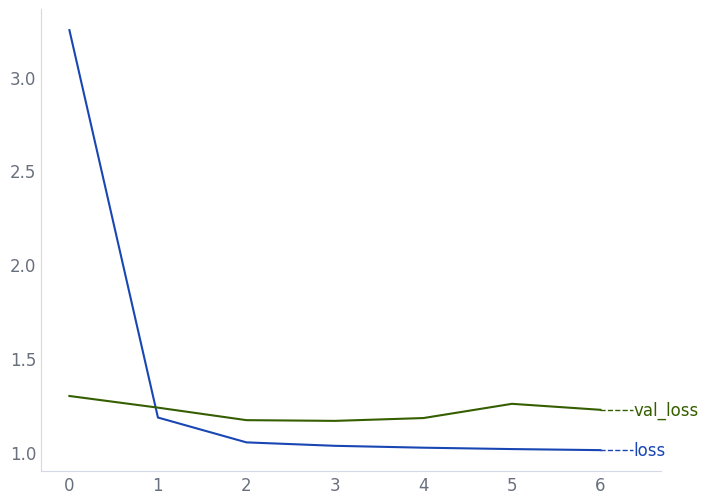

In [44]:
pd.DataFrame(history.history).plot()
rp.line_labels()

<Axes: ylabel='Density'>

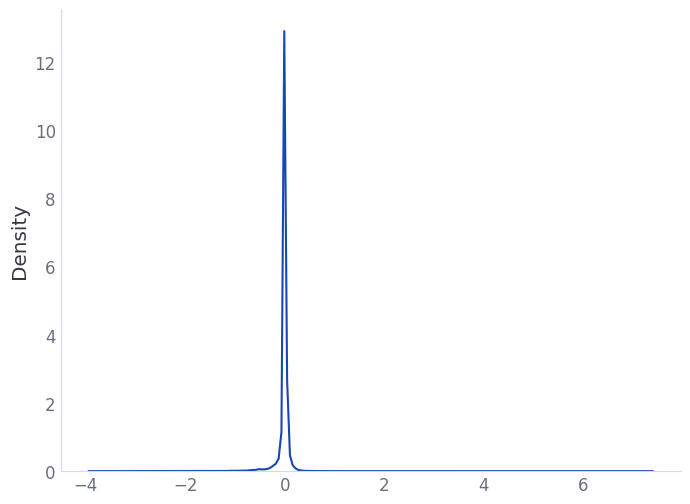

In [45]:
resid = mod.predict_dist(X).loc.reshape(-1)-y

sns.kdeplot(resid / num_atoms)
# xx = jnp.linspace(-10, 10, 1000)
# plt.plot(xx, jnp.exp(-jnp.abs(xx)))

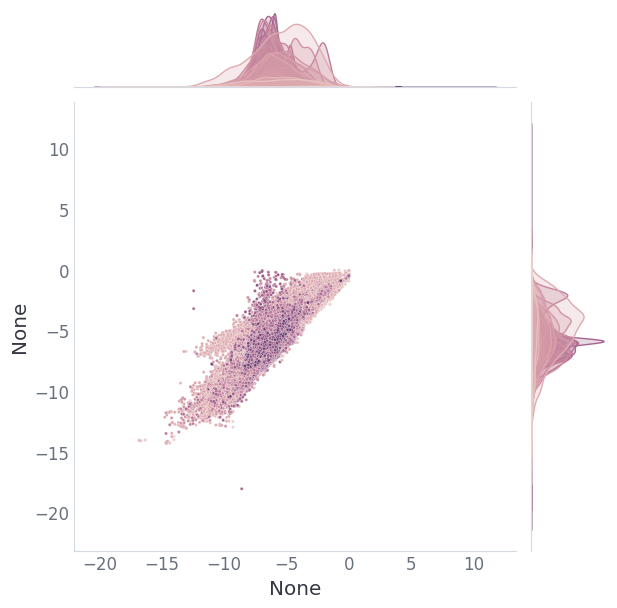

In [46]:
sns.jointplot(x=mod.predict_dist(X).loc.reshape(-1).clip(-17.5, 0), y=y, kind='scatter', alpha=1, s=5, hue=np.log(1 + num_atoms), legend=None)

In [47]:
pd.Series(ops.exp(global_scale + mod.scale.get_weights()[0]).reshape(-1).tolist(), index=df.columns[:-2]).sort_values()

Ar    1.289774
Ne    1.854770
Xe    3.835319
He    3.840301
Ac    3.862500
        ...   
U     4.098824
Ho    4.102476
Tm    4.117384
Hf    4.123620
Th    4.205824
Length: 90, dtype: float64

In [48]:
pd.Series(mod.shift.get_weights()[0].reshape(-1).tolist(), index=df.columns[:-2]).sort_values().loc[['H', 'He', 'Li', 'Be', 'B']]

H    -3.504272
He   -1.490225
Li   -2.907931
Be   -3.934924
B    -7.476737
dtype: float64

In [50]:
data = {
    'scale': mod.scale.get_weights()[0].reshape(-1),
    'shift': mod.shift.get_weights()[0].reshape(-1),
    'global_scale': mod.scale.get_weights()[1].reshape(-1),
    'global_shift': mod.shift.get_weights()[1].reshape(-1)
}

data

{'scale': array([ 0.        ,  0.02972345,  0.01805858,  0.0209124 ,  0.01387808,
         0.01711659,  0.03179088,  0.06004335,  0.01911166, -0.00386002,
         0.0395069 ,  0.02747471,  0.00865287,  0.01753046,  0.02929989,
         0.01303304,  0.04199979,  0.01476064,  0.02273637,  0.04534805,
         0.03963034,  0.02232738,  0.00345422,  0.03952241,  0.01110263,
         0.01176871,  0.04046109,  0.05531134,  0.01320497,  0.08129555,
         0.01962005,  0.02359699,  0.04278199,  0.01644148,  0.02728729,
         0.02013465,  0.03924578,  0.04882745,  0.06155674,  0.04626154,
         0.04104006,  0.01335492,  0.00862081,  0.03810922,  0.044342  ,
         0.02239231,  0.0229749 ,  0.02018039,  0.02714645,  0.02058169,
         0.02076415,  0.0215626 ,  0.0511481 ,  0.04826296,  0.05641598,
         0.04354961,  0.03421422,  0.00377025,  0.03708305,  0.03631373,
         0.02097396,  0.0332452 ,  0.05478399,  0.03551996,  0.02719724,
         0.01544989,  0.00927076,  0.01005

In [51]:
from facet.utils import save_pytree


save_pytree(data, 'precomputed/mp2022/stats.mpk')

In [52]:
from facet.utils import load_pytree


load_pytree('precomputed/mp2022/stats.mpk')

{'scale': array([ 0.        ,  0.02972345,  0.01805858,  0.0209124 ,  0.01387808,
         0.01711659,  0.03179088,  0.06004335,  0.01911166, -0.00386002,
         0.0395069 ,  0.02747471,  0.00865287,  0.01753046,  0.02929989,
         0.01303304,  0.04199979,  0.01476064,  0.02273637,  0.04534805,
         0.03963034,  0.02232738,  0.00345422,  0.03952241,  0.01110263,
         0.01176871,  0.04046109,  0.05531134,  0.01320497,  0.08129555,
         0.01962005,  0.02359699,  0.04278199,  0.01644148,  0.02728729,
         0.02013465,  0.03924578,  0.04882745,  0.06155674,  0.04626154,
         0.04104006,  0.01335492,  0.00862081,  0.03810922,  0.044342  ,
         0.02239231,  0.0229749 ,  0.02018039,  0.02714645,  0.02058169,
         0.02076415,  0.0215626 ,  0.0511481 ,  0.04826296,  0.05641598,
         0.04354961,  0.03421422,  0.00377025,  0.03708305,  0.03631373,
         0.02097396,  0.0332452 ,  0.05478399,  0.03551996,  0.02719724,
         0.01544989,  0.00927076,  0.01005

In [53]:
metadata

{'r_max_bins': [0.5,
  1.0,
  1.5,
  2.0,
  2.5,
  3.0,
  3.5,
  4.0,
  4.5,
  5.0,
  5.5,
  6.0,
  6.5,
  7.0,
  7.5,
  8.0,
  8.5,
  9.0,
  9.5,
  10.0,
  10.5,
  11.0,
  11.5,
  12.0],
 'r_max_counts': [[4864209.0,
   8.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  [4751104.0,
   91360.0,
   21738.0,
   15.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  [3968829.0,
   646654.0,
   112645.0,
   106714.0,
   29360.0,
   9.0,
   6.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  [1906667.0,
   1200705.0,
   840707.0,
   391645.0,
   437970.0,
   35218.0,
   50790.0,
   289.0,
   166.0,
   40.0,
   3.0,
   2.0,
   14.0,
   0.0,
   0.0,
   0.0,
   1.0],
  [788295.0,
   334374.0,
   768679.0,
   781874.0,
   1002107.0,
   437638.0,
   619004.0,
   68344.0,
   37675.0,
   15170.0,
   6270.0,
   1488.0,
   1621.0,


In [54]:
from facet.data.metadata import DatasetMetadata

kk = jnp.array(metadata['r_max_counts'])

ds_metadata = DatasetMetadata(
    dataset_name='mp2022',
    supported_targets=('energy',),
    batches_per_group=jnp.array(metadata['batches_per_group'], dtype=jnp.uint32),
    batch_num_atoms=metadata['num_atoms'],
    nearest_k=metadata['k'],
    batch_num_graphs=metadata['num_batch'],
    shift_energy=data['global_shift'].item(),
    scale_energy=data['global_scale'].item(),
    atomic_numbers=jnp.array(metadata['atomic_numbers'], dtype=jnp.uint8),
    atomwise_scale_energy=jnp.array(data['scale']),
    atomwise_shift_energy=jnp.array(data['shift']),
    r_max_quantile_r=jnp.array(metadata['r_max_bins']),
    r_max_quantile_k=kk / kk.sum(axis=-1, keepdims=True)
)

ds_metadata

DatasetMetadata(dataset_name='mp2022', supported_targets=('energy',), batches_per_group=Array([139, 139, 139, 139, 139, 139, 183, 179, 215, 195, 207, 271, 263,
       247, 263, 239, 243, 283, 299, 299, 303, 303, 295, 295, 279, 275,
       343, 359, 379, 363, 431, 463, 563, 687, 875, 631], dtype=uint32), batch_num_atoms=14, nearest_k=16, batch_num_graphs=32, shift_energy=0.6752875447273254, scale_energy=1.4414576292037964, atomic_numbers=Array([ 0, 14, 20, 33, 51, 29, 34, 69, 50, 89, 12, 13, 49, 47, 56, 79, 62,
       30, 93, 58, 21, 80, 83, 27, 81, 32, 57, 71, 31, 90, 55, 42, 64, 48,
       16, 41, 59, 40, 72, 91, 60, 25, 46, 35, 17, 52, 78, 45, 75, 19, 61,
       24, 66, 68, 67, 73, 26, 82, 63, 28, 38, 43, 65, 94, 77, 44, 15, 11,
       22,  3, 53,  1, 76,  4, 18, 70, 37,  5, 92,  9,  7, 39, 74, 10,  6,
        8, 23,  2, 36, 54], dtype=uint8), atomwise_shift_energy=Array([  0.        ,  -6.1666956 ,  -3.8685918 ,  -4.867869  ,
        -4.0514574 ,  -3.6854982 ,  -4.5747623 ,  -6.5847

In [55]:
from facet.utils import debug_structure


debug_structure(ds_metadata);

arg0 >>> DatasetMetadata
├── dataset_name
│   └── str=|
├── supported_targets >>> 0
│   └── str=|
├── batches_per_group
│   └── u32[36]
├── batch_num_atoms
│   └── int=14
├── nearest_k
│   └── int=16
├── batch_num_graphs
│   └── int=32
├── shift_energy
│   └── float=0.6752875447273254
├── scale_energy
│   └── float=1.4414576292037964
├── atomic_numbers
│   └── u8[90]
├── atomwise_shift_energy
│   └── f32[90]
├── atomwise_scale_energy
│   └── f32[90]
├── r_max_quantile_r
│   └── f32[24]
└── r_max_quantile_k
    └── f32[24, 17]

In [56]:
save_pytree(ds_metadata, 'precomputed/mp2022/metadata.mpk')